<img src=".\images\Logo.png" width=150 align="left" /> <img src=".\images\Logo2.jpg" width=450 align="right" />


# <center><font color= #1e8449 > <b>CU04_Optimización de vacunas</font></center>

<font color='steelblue'><b>Citizenlab Data Science Methodology > III - Feature Engineering Domain </font>
***
> # <font color='steelblue'> <b>16.- Feature Selection</font>

<font color='steelblue'>Feature Selection is the process where you automatically or manually select the most relevant features which contribute most to the correct output of the model.</font>


## <font color='steelblue'>Tasks</font>

<font color='steelblue'><b>Perform Selection of Categorical-Input/Categorical-Output</b>	
- Encoding-Categorical-Features
- Chi-Squared-Feature-Selection
- Mutual-Information-Feature-Selection
- Evaluate-a-Logistic-Regression-model
    
<font color='steelblue'><b>Perform Selection of Numerical-Input/Categorical-Output</b>	
- ANOVA-F-test-Feature-Selection
- Mutual-Information-Feature-Selection
- Evaluating-a-Logistic-Regression-model
- Tuning-the-Number-of-Selected-Features
    
<font color='steelblue'><b>Perform Selection of Numerical-Input/Numerical-Output</b>	
- Correlation-with-the-outcome-Feature-Selection
- Mutual-Information-Feature-Selection
- Evaluate-a-Lineal-Regression-model
- Tuning-the-Number-of-Selected-Features
    
<font color='steelblue'><b>Perform Selection of Any-data</b>	
- RFE-(Recursive-Feature-Elimination)
- Tuning-the-Number-of-Selected-Features
- Automatically-Select-the-Number-of-Features
    
<font color='steelblue'><b>Explore the use of diferent algorithms wrapped by RFE</b>	
    
<font color='steelblue'><b>Explore the use od Hybrid feature selection algorithms</b>	

## Consideraciones casos CitizenLab programados en R

* Algunas de las tareas de este proceso se han realizado en los notebooks del proceso 05 Data Collection porque eran necesarias para las tareas ETL. En esos casos, en este notebook se referencia al notebook del proceso 05 correspondiente
* Otras tareas típicas de este proceso se realizan en los notebooks del dominio IV al ser más eficiente realizarlas en el propio pipeline de modelización.
* Por tanto en los notebooks de este proceso de manera general se incluyen las comprobaciones necesarias, y comentarios si procede
* Las tareas del proceso se van a aplicar solo a los archivos que forman parte del despliegue, ya que hay muchos archivos intermedios que no procede pasar por este proceso
* El nombre de archivo del notebook hace referencia al nombre de archivo del proceso 05 al que se aplica este proceso, por eso pueden no ser correlativa la numeración
* Las comprobaciones se van a realizar teniendo en cuenta que el lenguaje utilizado en el despliegue de este caso es R

## <font color='green'>File</font>

- <font color='steelblue'> <b>Input File: CU_04_08_20_vacunacion_gripe_train_and_test.csv</font>
- <font color='steelblue'> <b>Output File: No aplica</font>

### Encoding

Con la siguiente expresión se evitan problemas con el encoding al ejecutar el notebook. Es posible que deba ser eliminada o adaptada a la máquina en la que se ejecute el código.

In [1]:
Sys.setlocale(category = "LC_ALL", locale = "es_ES.UTF-8")

Warning message in Sys.setlocale(category = "LC_ALL", locale = "es_ES.UTF-8"):
“OS reports request to set locale to "es_ES.UTF-8" cannot be honored”


[1] ""

## <font color='green'>Settings</font>

### Libraries to use

In [9]:
library(caret)
library(readr)
library(dplyr)
library(tidyr)
library(forcats)
library(lubridate)


Loading required package: ggplot2

Loading required package: lattice



### Paths

In [3]:
iPath <- "Data/Input/"
oPath <- "Data/Output/"

## <font color='green'>Data Load</font>

<font color='tomato'><b> OPCION A:</b> Seleccionar fichero en ventana para mayor comodidad</font> 

Data load using the {tcltk} package. Ucomment the line if using this option

In [4]:
# file_data <- tcltk::tk_choose.files(multi = FALSE)

<font color='tomato'><b> OPCION B:</b> Especificar el nombre de archivo</font>



In [28]:
iFile <- "CU_04_08_20_vacunacion_gripe_train_and_test.csv"
file_data <- paste0(iPath, iFile)

if(file.exists(file_data)){
    cat("Se leerán datos del archivo: ", file_data)
} else{
    warning("Cuidado: el archivo no existe.")
}


Se leerán datos del archivo:  Data/Input/CU_04_08_20_vacunacion_gripe_train_and_test.csv

#### Data file to dataframe

Usar la función adecuada según el formato de entrada (xlsx, csv, json, ...)

In [29]:
data <- read_csv(file_data)


Rows: 21736 Columns: 49
── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): GEOCODIGO, DESBDT, nombre_zona
dbl (45): ano, semana, n_vacunas, n_citas, tmed, prec, velmedia, presMax, be...
lgl  (1): is_train

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Estructura de  los datos:

In [30]:
data |> glimpse()

Rows: 21,736
Columns: 49
$ GEOCODIGO         <chr> "259", "260", "041", "025", "046", "159", "065", "09…
$ DESBDT            <chr> "V Centenario", "Valdeacederas", "Canillejas", "Bara…
$ ano               <dbl> 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2021, 2023…
$ semana            <dbl> 34, 8, 9, 49, 24, 3, 8, 47, 1, 2, 52, 39, 16, 50, 34…
$ n_vacunas         <dbl> 0, 0, 0, 292, 0, 524, 0, 248, 204, 205, NA, 0, 0, 51…
$ n_citas           <dbl> 0, 0, 0, 280, 0, 498, 0, 228, 198, 187, NA, 0, 0, 51…
$ tmed              <dbl> 27.278748, 9.577289, 8.536554, 9.065363, 29.905728, …
$ prec              <dbl> 0.169955881, 1.264910043, 3.122881160, 7.313886680, …
$ velmedia          <dbl> 2.297067, 1.890425, 2.418071, 1.562328, 2.564749, 1.…
$ presMax           <dbl> 940.0420, 944.1770, 949.7179, 941.8342, 940.5669, 95…
$ benzene           <dbl> 0.1764413, 0.4591543, 0.4099159, 0.4224172, 0.195865…
$ co                <dbl> 0.4987735, 0.3960647, 0.3951587, NA, 0.2891224, 0.50…
$ no           

Muestra de los primeros datos:

In [31]:
data |> slice_head(n = 5)

GEOCODIGO,DESBDT,ano,semana,n_vacunas,n_citas,tmed,prec,velmedia,presMax,⋯,t9_1,t10_1,t11_1,t12_1,area,densidad_hab_km,tuits_gripe,interes_gripe,Target,is_train
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
259,V Centenario,2022,34,0,0,27.278748,0.16995588,2.297067,940.0420,⋯,0.5151383,0.09258503,0.6406787,0.7028586,2100118.9,15131.524,60,24,0,TRUE
260,Valdeacederas,2022,8,0,0,9.577289,1.26491004,1.890425,944.1770,⋯,0.3863876,0.13151901,0.5451465,0.6277335,1164622.0,22498.286,56,15,0,TRUE
041,Canillejas,2022,9,0,0,8.536554,3.12288116,2.418071,949.7179,⋯,0.3129631,0.13926119,0.4600730,0.5346482,1597474.5,17939.566,72,24,0,TRUE
025,Barajas,2022,49,292,280,9.065363,7.31388668,1.562328,941.8342,⋯,0.4611972,0.10460043,0.5920292,0.6590530,3816572.0,5893.247,196,77,292,TRUE
046,Castelló,2022,24,0,0,29.905728,0.01366852,2.564749,940.5669,⋯,0.7018126,0.06114283,0.4717699,0.5025317,870986.8,17738.501,46,21,0,TRUE


## Selecting Categorical Input / Categorical Output

### Encoding Categorical Features

In [61]:
# Convert all character columns to factors
data <- mutate_if(data, is.character, as.factor)
data <- na.omit(data)

train_set <- subset(data[data$is_train == TRUE, ], select = -is_train)
train_set <- select_if(train_set, is.numeric)
test_set <- subset(data[data$is_train == FALSE, ], select = -is_train)
test_set <- select_if(test_set, is.numeric)

### Chi-Squared Feature Selection

No aplica ya que el Target no es categórico.

In [62]:
# # Set the threshold
# threshold = 0.05

# # Create an empty vector to store p-values
# p_values <- sapply(train_data[ , -which(names(train_data) == "Target")], function(x) {
#   chisq <- chisq.test(table(x, train_data$Target))
#   return(chisq$p.value)
# })

# # Select variables with p-values less than a certain threshold (for example, 0.05)
# selected_features <- names(p_values)[p_values < threshold]

# # Print selected features
# print(selected_features)

### Mutual Information Feature Selection

No aplica ya que el Target no es categórico.

In [63]:
# # install the necessary packages if not already installed
# if (!require(FSelectorRcpp)) {
#   install.packages('FSelectorRcpp')
# }

# # Load necessary library
# library(FSelectorRcpp)

# # Calculate mutual information between each variable and the target
# mi_scores <- information_gain(train_data[, setdiff(names(train_data), "Target")], train_data$Target)

# # Convert the top_features object into a dataframe
# mi_scores_df <- as.data.frame(mi_scores)

# # Rename the columns
# names(mi_scores_df) <- c("Feature", "Score")

# # Order the dataframe by Score in descending order
# mi_scores_df <- mi_scores_df[order(-mi_scores_df$Score),]

# # Create a bar plot
# ggplot(mi_scores_df, aes(x = reorder(Feature, Score), y = Score)) +
#   geom_bar(stat = "identity", fill = "steelblue") +
#   coord_flip() +
#   xlab("Features") +
#   ylab("Mutual Information Score") +
#   ggtitle("Top Features by Mutual Information") +
#   theme_minimal()

### Evaluating a Logistic Regression model

No aplica ya que el Target no es categórico.

<font color='tomato'>Select numer of Features to use</font>

In [64]:
# Select numer of Features to use
k <- 5

<font color='darkgrey'><b>Operation</font>

In [65]:
# # Fit a linear regression model
# model_all_features <- glm(Target ~ ., data = select_if(train_set, is.numeric))

# # Predict on the test set
# predictions <- predict(model_all_features, newdata = test_set)

# # Evaluate the model
# postResample(pred = predictions, obs = test_set$Target)

In [66]:
# # Select the top k features
# top_features <- names(top_features)[1:k]

# # Fit a linear regression model with only the top k features
# model_top_features <- glm(Target ~ ., data = select_if(train_set, is.numeric)[, c(top_features, "Target")])

# # Predict on the test set
# predictions_top_features <- predict(model_top_features, newdata = test_set[, top_features])

# # Evaluate the model
# postResample(pred = predictions_top_features, obs = test_set$Target)

## Selecting Numerical Input / Categorical Output

No aplica ya que el Target no es categórico.

<font color='darkgrey'><b>Operation</font>

### ANOVA F-test Feature Selection

### Mutual Information Feature Selection

### Evaluating a Logistic Regression model

<font color='tomato'>Selecting feature to use</font>

In [67]:
# Select numer of Features to use


<font color='darkgrey'><b>Operation</font>

### Tuning the Number of Selected Features

#### Know the best number of features to select

#### See the relationship between the number of selected features and accuracy

## Selecting Numerical Input / Numerical Output

### Correlation with the outcome Feature Selection

In [68]:
# Calculate the correlation between each feature and the outcome variable
correlations <- sapply(select_if(train_set, is.numeric)[, -which(names(select_if(train_set, is.numeric)) %in% "Target")], function(x) cor(x, train_set$Target))

# Create a dataframe from the correlations
correlation_df <- data.frame(Feature = names(correlations), Correlation = correlations)

# Sort the dataframe by the absolute values of the correlations in descending order
correlation_df <- correlation_df[order(-abs(correlation_df$Correlation)), ]

# Print the correlation dataframe
print(correlation_df)

                            Feature  Correlation
n_vacunas                 n_vacunas  1.000000000
n_citas                     n_citas  0.999130400
interes_gripe         interes_gripe  0.586498046
tmed                           tmed -0.585515629
scampana                   scampana  0.539384124
capacidad_zona       capacidad_zona  0.518963147
t1_1                           t1_1  0.518958470
o3                               o3 -0.515131533
nsec                           nsec  0.415394240
benzene                     benzene  0.403689076
tuits_gripe             tuits_gripe  0.375181698
nox                             nox  0.282164710
no                               no  0.272879071
no2                             no2  0.259185375
so2                             so2 -0.201351922
t11_1                         t11_1  0.162866925
t3_1                           t3_1 -0.136262423
co                               co  0.135689359
t12_1                         t12_1  0.135599031
pm10                

### Mutual Information Feature Selection

Warning message in .information_gain.data.frame(formula, data, type = type, equal = equal, :
“There are missing values in the dependent variable information_gain will remove them.”
Warning message in .information_gain.data.frame(formula, data, type = type, equal = equal, :
“Dependent variable is a numeric! It will be converted to factor with simple factor(y). We do not discretize dependent variable in FSelectorRcpp by default! You can choose equal frequency binning discretization by setting equal argument to TRUE.”


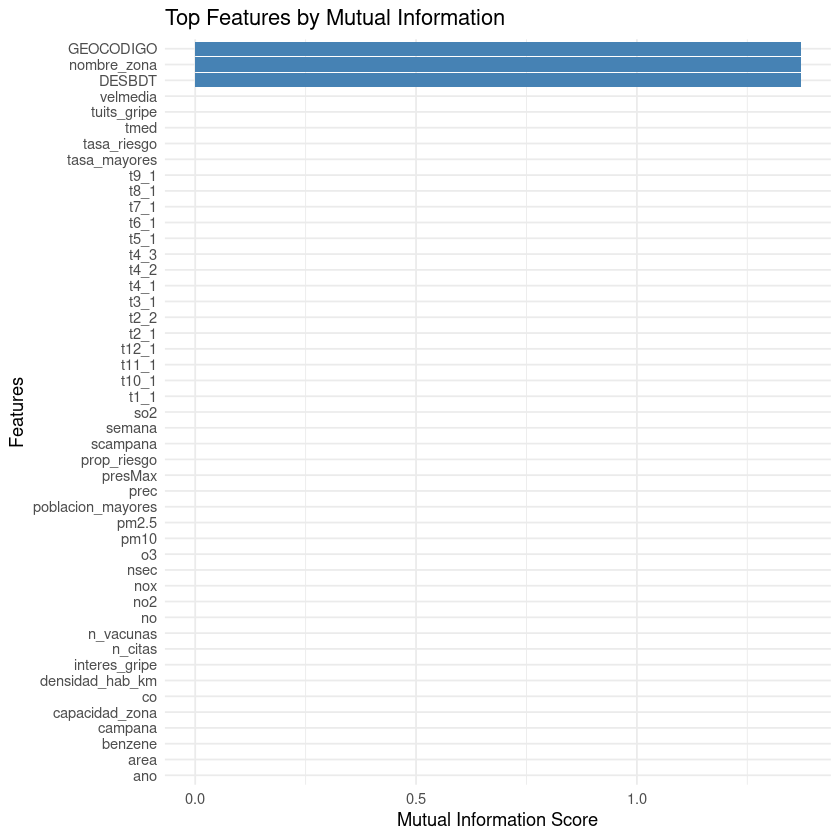

In [69]:
# install the necessary packages if not already installed
if (!require(FSelectorRcpp)) {
  install.packages('FSelectorRcpp')
}

# Load necessary library
library(FSelectorRcpp)

# Calculate mutual information between each variable and the target
mi_scores <- information_gain(train_data[, setdiff(names(train_data), "Target")], train_data$Target)

# Convert the top_features object into a dataframe
mi_scores_df <- as.data.frame(mi_scores)

# Rename the columns
names(mi_scores_df) <- c("Feature", "Score")

# Order the dataframe by Score in descending order
mi_scores_df <- mi_scores_df[order(-mi_scores_df$Score),]

# Create a bar plot
ggplot(mi_scores_df, aes(x = reorder(Feature, Score), y = Score)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  coord_flip() +
  xlab("Features") +
  ylab("Mutual Information Score") +
  ggtitle("Top Features by Mutual Information") +
  theme_minimal()

### Evaluating a Lineal Regression model

<font color='tomato'>Selecting feature to use</font>

In [70]:
# Select numer of Features to use
k <- 5

<font color='darkgrey'><b>Operation</font>

In [71]:
# Fit a linear regression model
model_all_features <- lm(Target ~ ., data = train_set)

# Predict on the test set
predictions <- predict(model_all_features, newdata = test_set)

# Evaluate the model
postResample(pred = predictions, obs = test_set$Target)

Warning message in predict.lm(model_all_features, newdata = test_set):
“prediction from a rank-deficient fit may be misleading”


RMSE     Rsquared          MAE 
8.930860e-13 1.000000e+00 7.180032e-13

In [72]:
# Select the top k features
top_features <- names(mi_scores)[1:k]

# Fit a linear regression model with only the top k features
model_top_features <- lm(Target ~ ., data = train_set[, c(top_features, "Target")])

# Predict on the test set
predictions_top_features <- predict(model_top_features, newdata = test_set[, top_features])

# Evaluate the model
postResample(pred = predictions_top_features, obs = test_set$Target)

ERROR: [1m[33mError[39m in `train_set[, c(top_features, "Target")]`:[22m
[33m![39m Can't subset columns that don't exist.
[31m✖[39m Columns NA don't exist.


## Any data: RFE (Recursive Feature Elimination)

### RFE for Classification

No aplica ya que el Target no es categórico.

<font color='tomato'>Selecting feature to use</font>

In [ ]:
# Select numer of Features to use


<font color='darkgrey'><b>Operation</font>

### RFE for Regression

<font color='tomato'>Selecting feature to use</font>

In [73]:
# Select numer of Features to use
k <- 5

<font color='darkgrey'><b>Operation</font>

In [74]:
# Define control parameters for rfe function
ctrl <- rfeControl(functions=lmFuncs, method="cv", number=10)

# Determine number of predictors
predictors_number <- ncol(train_set) - 1 # Assuming the last column is the target variable

# Apply the RFE algorithm with cross validation.
result <- rfe(train_set[, !names(train_set) %in% "Target"], train_set$Target, sizes=c(1:predictors_number), rfeControl=ctrl)

# Print the result
print(result)

# Top ranking variables in the optimal subset size
top_features <- predictors(result, result$optsize)

Warning message in predict.lm(object, x):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(object, x):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(object, x):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(object, x):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(object, x):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(object, x):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(object, x):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(object, x):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(object, x):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(object, x):
“prediction from a rank-deficient fit may be misleading”
Warning me


Recursive feature selection

Outer resampling method: Cross-Validated (10 fold) 

Resampling performance over subset size:

 Variables      RMSE Rsquared       MAE    RMSESD RsquaredSD     MAESD Selected
         1 3.308e-12        1 2.705e-12 4.069e-12          0 3.326e-12         
         2 3.307e-12        1 2.706e-12 4.065e-12          0 3.326e-12         
         3 3.306e-12        1 2.703e-12 4.070e-12          0 3.328e-12         
         4 3.306e-12        1 2.702e-12 4.069e-12          0 3.327e-12         
         5 3.304e-12        1 2.703e-12 4.062e-12          0 3.320e-12         
         6 3.306e-12        1 2.705e-12 4.071e-12          0 3.328e-12         
         7 3.308e-12        1 2.704e-12 4.071e-12          0 3.328e-12         
         8 3.306e-12        1 2.703e-12 4.077e-12          0 3.334e-12         
         9 3.303e-12        1 2.700e-12 4.066e-12          0 3.325e-12         
        10 3.305e-12        1 2.702e-12 4.068e-12          0 3.326e-12     